# Simulation Dynamics emulator 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
from data_processing.start_experiment import *
from data_processing.read_data import *
from data_processing.gaussian import *

In [4]:
num_experiments = 100
parameter_list = ['gamma', 'gradnoise']

In [5]:
file_names = ["gradient_latin/latin_{}.par".format(i) for i in range(num_experiments)]
data_files = ["gradient_latin/data_cellcount_{}.txt".format(i) for i in range(num_experiments)]

In [6]:
X = get_parameter_array(file_names,parameter_list)

In [7]:
Y = get_rewards(data_files, average_function_over_time(average_angle_diff_to_peak))
print(np.min(Y))
print(np.max(Y))
print(np.argmin(Y))
print(np.argmax(Y))
print(X[np.argmin(Y)])


1.4035187654323724
1.5793813517429747
62
5
[9.     0.9863]


In [8]:
print(X[np.argmax(Y)])

[21.      0.3425]


In [9]:
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
import GPy
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction



In [10]:
kernel = GPy.kern.RBF(input_dim=2, ARD=True, lengthscale=[1,1], variance=1)
model_gpy = GPRegression(X, Y ,kernel = kernel,normalizer=True,noise_var=0.05)
model_gpy.parameters[0].variance.fix()
model_gpy.parameters[1].variance.fix()
model_emukit = GPyModelWrapper(model_gpy)
model_emukit.optimize()

In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 0.92, 'Predicted angle difference between chemotaxis vector and ground truth gradient position based on gamma and gradient noise')

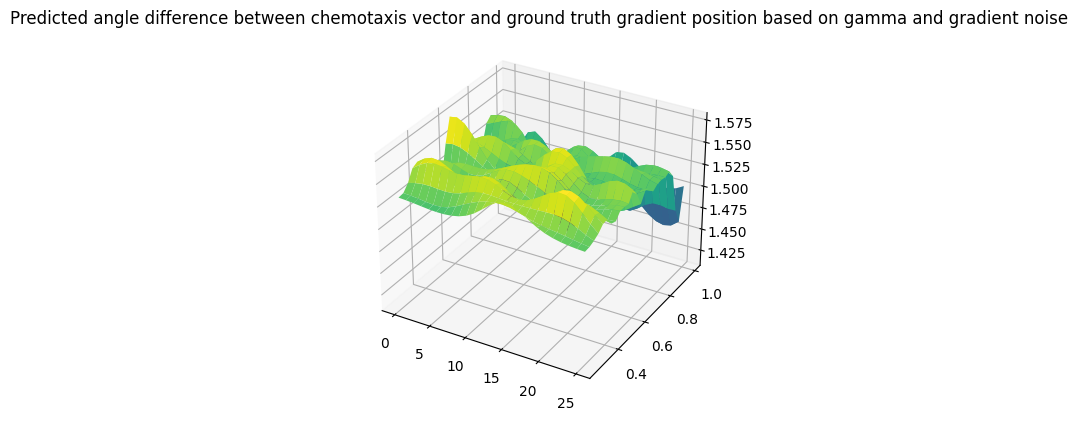

In [12]:
parameter_space = ParameterSpace([
                                DiscreteParameter('gamma',list(range(0,25))),
                                ContinuousParameter('gradnoise',0.25,0.99)])

_gamma_test = np.linspace(0, 25, 25)
_gradnoise_test = np.linspace(0.25, 0.99, 25)

coords_gamma, coords_gradnoise = np.meshgrid(_gamma_test, _gradnoise_test)

_mean, _var = model_emukit.predict(np.c_[coords_gamma.ravel(), coords_gradnoise.ravel()])

reshaped_mean = _mean.reshape(coords_gamma.shape)


ax = plt.axes(projection='3d')
ax.plot_surface(coords_gamma, coords_gradnoise, reshaped_mean, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Predicted angle difference between chemotaxis vector and ground truth gradient position based on gamma and gradient noise')
# ax.scatter(model_emukit.X[0][0], model_emukit.X[0][1], model_emukit.Y[0], color='red', s=300, marker='x')

In [13]:
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity
center_of_mass_sa_gpbased = MonteCarloSensitivity(model = model_emukit, input_domain = parameter_space)

main_effects_gp, total_effects_gp, _ = center_of_mass_sa_gpbased.compute_effects(num_monte_carlo_points = 10000)

print(main_effects_gp)
print(total_effects_gp)

{'gamma': array([1.66392291]), 'gradnoise': array([0.79553495])}
{'gamma': array([-2.48923844]), 'gradnoise': array([-0.19335989])}


(0.7955349530432148, -0.19335989178698634)


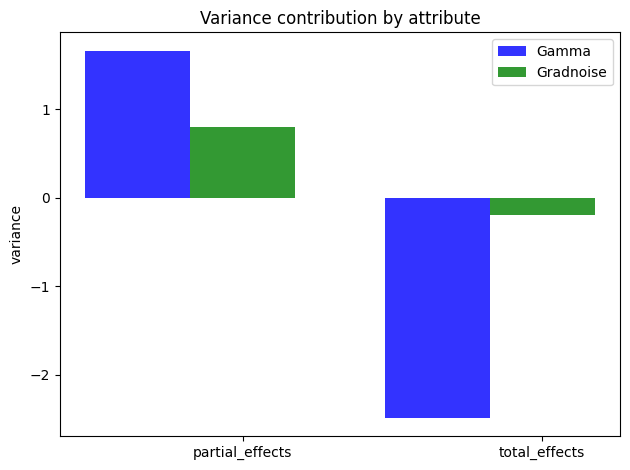

In [14]:
n_groups = 2
means_frank = (main_effects_gp['gamma'][0], total_effects_gp['gamma'][0] )
means_guido = (main_effects_gp['gradnoise'][0], total_effects_gp['gradnoise'][0])
print(means_guido)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Gamma')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Gradnoise')

# plt.xlabel('Variance groups')
plt.ylabel('variance')
plt.title('Variance contribution by attribute')
plt.xticks(index + bar_width, ('partial_effects', 'total_effects'))
plt.legend()

plt.tight_layout()
plt.show()

* As expected, higher gradnoise (counter-intuitive, but it actually leads to higher chemotaxis precision in the C code) leads to better precision. Gamma looks strange (Ideally, the highest precision should be achieved under lowest gamma/ highest gradnoise combination)

In [15]:
Y = get_rewards(data_files, average_function_over_time(average_angle_migration_to_peak))
print(Y[34])


[1.16493083]


In [16]:
print(Y[34])

[1.16493083]


In [17]:
kernel = GPy.kern.RBF(input_dim=2, ARD=True, lengthscale=[1,1], variance=1)
model_gpy = GPRegression(X, Y ,kernel = kernel,normalizer=True,noise_var=0.05)
model_gpy.parameters[0].variance.fix()
model_gpy.parameters[1].variance.fix()
model_emukit = GPyModelWrapper(model_gpy)
model_emukit.optimize()

Text(0.5, 0.92, 'Predicted angle difference between chemotaxis vector and ground truth gradient position based on gamma and gradient noise')

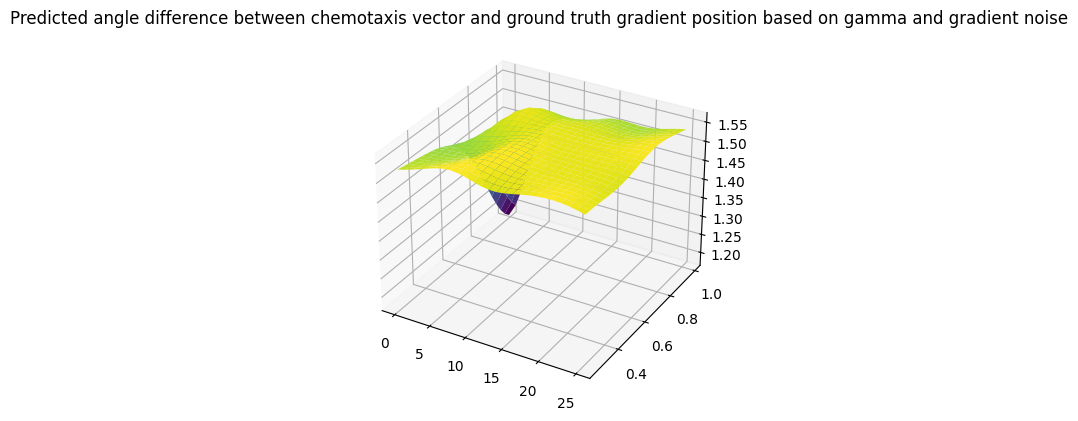

In [18]:
parameter_space = ParameterSpace([
                                DiscreteParameter('gamma',list(range(0,25))),
                                ContinuousParameter('gradnoise',0.25,0.99)])

_gamma_test = np.linspace(0, 25, 25)
_gradnoise_test = np.linspace(0.25, 0.99, 25)

coords_gamma, coords_gradnoise = np.meshgrid(_gamma_test, _gradnoise_test)

_mean, _var = model_emukit.predict(np.c_[coords_gamma.ravel(), coords_gradnoise.ravel()])

reshaped_mean = _mean.reshape(coords_gamma.shape)


ax = plt.axes(projection='3d')
ax.plot_surface(coords_gamma, coords_gradnoise, reshaped_mean, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Predicted angle difference between migration vector and ground truth gradient position based on gamma and gradient noise')